# Gasoline Price Prediction
Time Series is a time dependant method that analyses a collection of data points at constant time intervals. There are 3 components of Time Series; trends, seasonality, heterodaskisity. It is a very practical method to forecast a group of observations on a single entity over time.In many Time Series, there are seasonality trends, e.g. variations to a specific time frame. For instance, if you see the prices of stock value of skiing equipments flactuates over time, you would expect to find higher prices during Winter seasons...

In [1]:
# importing all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
GasolinePrice = r"G:\My Drive\Data Science\Ch 7 - Second Capstone\Gasoline Project Folder\GasolinePrice.csv"

In [3]:
data= pd.read_csv(GasolinePrice)
data.head()

,Date,"Branded Fuel- Distribution Costs, Marketing Costs, and Profits",Branded Fuel- Crude Oil Cost,Branded Fuel- Refinery Costs and Profits,Branded Fuel- State Underground Storage Tank Fee:,Branded Fuel- State and Local Sales Tax,Branded Fuel- State Excise Tax,Branded Fuel- Federal Excise Tax,Branded Fuel- Average Retail prices,Unnamed: 9,"Unbranded Fuel- Distribution Costs, Marketing Costs, and Profits",Unbranded Fuel- Crude Oil Cost,Unbranded Fuel- Refinery Costs and Profits,Unbranded Fuel- State Underground Storage Tank Fee:,Unbranded Fuel- State and Local Sales Tax,Unbranded Fuel- State Excise Tax,Unbranded Fuel- Federal Excise Tax,Unbranded Fuel- Average Retail prices
0,1/4/1999,$0.14,$0.25,$0.29,$0.00,$0.08,$0.18,$0.18,$1.13,NaN,$0.20,$0.25,$0.23,$0.00,$0.08,$0.18,$0.18,$1.13
1,1/11/1999,$0.15,$0.27,$0.26,$0.00,$0.08,$0.18,$0.18,$1.13,NaN,$0.20,$0.27,$0.21,$0.00,$0.08,$0.18,$0.18,$1.13
2,1/18/1999,$0.14,$0.25,$0.28,$0.00,$0.08,$0.18,$0.18,$1.12,NaN,$0.23,$0.25,$0.20,$0.00,$0.08,$0.18,$0.18,$1.12
3,1/25/1999,$0.15,$0.25,$0.26,$0.00,$0.08,$0.18,$0.18,$1.12,NaN,$0.22,$0.25,$0.20,$0.00,$0.08,$0.18,$0.18,$1.12
4,2/1/1999,$0.15,$0.26,$0.26,$0.00,$0.08,$0.18,$0.18,$1.11,NaN,$0.18,$0.26,$0.22,$0.00,$0.08,$0.18,$0.18,$1.11


In [4]:
#identifying the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Date                                                              1228 non-null   object 
 1   Branded Fuel- Distribution Costs, Marketing Costs, and Profits    1225 non-null   object 
 2   Branded Fuel- Crude Oil Cost                                      1225 non-null   object 
 3   Branded Fuel- Refinery Costs and Profits                          1225 non-null   object 
 4   Branded Fuel- State Underground Storage Tank Fee:                 1225 non-null   object 
 5   Branded Fuel- State and Local Sales Tax                           1225 non-null   object 
 6   Branded Fuel- State Excise Tax                                    1225 non-null   object 
 7   Branded Fuel- Federal Excise Tax 

In [5]:
#identifying the datatypes
data.dtypes

Date                                                                 object
Branded Fuel- Distribution Costs, Marketing Costs, and Profits       object
Branded Fuel- Crude Oil Cost                                         object
Branded Fuel- Refinery Costs and Profits                             object
Branded Fuel- State Underground Storage Tank Fee:                    object
Branded Fuel- State and Local Sales Tax                              object
Branded Fuel- State Excise Tax                                       object
Branded Fuel- Federal Excise Tax                                     object
Branded Fuel- Average Retail prices                                  object
Unnamed: 9                                                          float64
Unbranded Fuel- Distribution Costs, Marketing Costs, and Profits     object
Unbranded Fuel- Crude Oil Cost                                       object
Unbranded Fuel- Refinery Costs and Profits                           object
Unbranded Fu

In [6]:
#identifying the datatypes
data.shape

(1228, 18)

In [7]:
#identifying the datatypes
data.columns

Index(['Date',
       'Branded Fuel- Distribution Costs, Marketing Costs, and Profits',
       'Branded Fuel- Crude Oil Cost',
       'Branded Fuel- Refinery Costs and Profits',
       'Branded Fuel- State Underground Storage Tank Fee:',
       'Branded Fuel- State and Local Sales Tax',
       'Branded Fuel- State Excise Tax', 'Branded Fuel- Federal Excise Tax',
       'Branded Fuel- Average Retail prices', 'Unnamed: 9',
       'Unbranded Fuel- Distribution Costs, Marketing Costs, and Profits',
       'Unbranded Fuel- Crude Oil Cost',
       'Unbranded Fuel- Refinery Costs and Profits',
       'Unbranded Fuel- State Underground Storage Tank Fee:',
       'Unbranded Fuel- State and Local Sales Tax',
       'Unbranded Fuel- State Excise Tax',
       'Unbranded Fuel- Federal Excise Tax',
       'Unbranded Fuel- Average Retail prices'],
      dtype='object')

In [4]:
# Selecting the data
df = data[['Date', 'Branded Fuel- Average Retail prices', 'Unbranded Fuel- Average Retail prices']]
df.head()

,Date,Branded Fuel- Average Retail prices,Unbranded Fuel- Average Retail prices
0,1/4/1999,$1.13,$1.13
1,1/11/1999,$1.13,$1.13
2,1/18/1999,$1.12,$1.12
3,1/25/1999,$1.12,$1.12
4,2/1/1999,$1.11,$1.11


In [9]:
df.tail()

,Date,Branded Fuel- Average Retail prices,Unbranded Fuel- Average Retail prices
1223,6/13/2022,$6.27,$6.27
1224,6/20/2022,$6.22,$6.22
1225,6/27/2022,$6.14,$6.14
1226,7/4/2022,$6.04,$6.04
1227,7/11/2022,$5.90,$5.90


In [5]:
# convert the data from object to datetime, to prevent future problems in plotting on a histogram
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df

,Date,Branded Fuel- Average Retail prices,Unbranded Fuel- Average Retail prices
0,1999-01-04,$1.13,$1.13
1,1999-01-11,$1.13,$1.13
2,1999-01-18,$1.12,$1.12
3,1999-01-25,$1.12,$1.12
4,1999-02-01,$1.11,$1.11
...,...,...,...
1223,2022-06-13,$6.27,$6.27
1224,2022-06-20,$6.22,$6.22
1225,2022-06-27,$6.14,$6.14
1226,2022-07-04,$6.04,$6.04


In [6]:
# convert the columns from dollar value to integer
df['Branded Fuel- Average Retail prices']= df['Branded Fuel- Average Retail prices'].str.replace('$', '').astype(float)
df['Unbranded Fuel- Average Retail prices']= df['Unbranded Fuel- Average Retail prices'].str.replace('$', '').astype(float)
df.head()

,Date,Branded Fuel- Average Retail prices,Unbranded Fuel- Average Retail prices
0,1999-01-04,1.13,1.13
1,1999-01-11,1.13,1.13
2,1999-01-18,1.12,1.12
3,1999-01-25,1.12,1.12
4,1999-02-01,1.11,1.11


In [7]:
df['avgPrice'] = (df['Branded Fuel- Average Retail prices']+ df['Unbranded Fuel- Average Retail prices'])/2

In [15]:
df.head()

,Date,Branded Fuel- Average Retail prices,Unbranded Fuel- Average Retail prices,avgPrice
0,1999-01-04,1.13,1.13,1.13
1,1999-01-11,1.13,1.13,1.13
2,1999-01-18,1.12,1.12,1.12
3,1999-01-25,1.12,1.12,1.12
4,1999-02-01,1.11,1.11,1.11


In [8]:
#renaming the columns
df.rename(columns={"avgPrice": "Price"}, inplace=True)

In [17]:
df.dtypes

Date                                     datetime64[ns]
Branded Fuel- Average Retail prices             float64
Unbranded Fuel- Average Retail prices           float64
Price                                           float64
dtype: object

In [18]:
df['Price'].describe()

count    1228.000000
mean        2.940908
std         0.955568
min         1.100000
25%         2.147500
50%         3.040000
75%         3.620000
max         6.270000
Name: Price, dtype: float64

In [9]:
df['Year'] = df['Date'].apply(lambda t: t.year)
df['Month'] = df['Date'].apply(lambda t: t.month)
df['Week'] = df['Date'].apply(lambda t: t.week)
df.head()

,Date,Branded Fuel- Average Retail prices,Unbranded Fuel- Average Retail prices,Price,Year,Month,Week
0,1999-01-04,1.13,1.13,1.13,1999,1,1
1,1999-01-11,1.13,1.13,1.13,1999,1,2
2,1999-01-18,1.12,1.12,1.12,1999,1,3
3,1999-01-25,1.12,1.12,1.12,1999,1,4
4,1999-02-01,1.11,1.11,1.11,1999,2,5


In [11]:
df.set_index("Date", inplace=True)

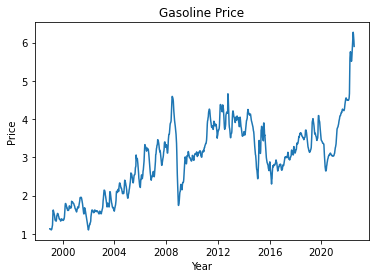

In [40]:
#visualizing the data
plt.plot(df.index, df.Price)
plt.title('Gasoline Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


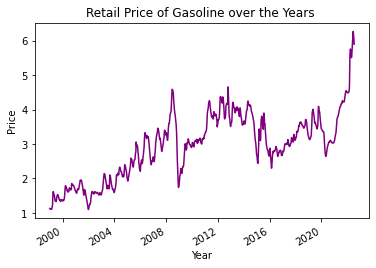

In [41]:
df['Price'].plot(style=['-'], x='Year', y='Price', c='purple')
plt.title("Retail Price of Gasoline over the Years ") 
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Retail Price of Gasoline over the Years ')

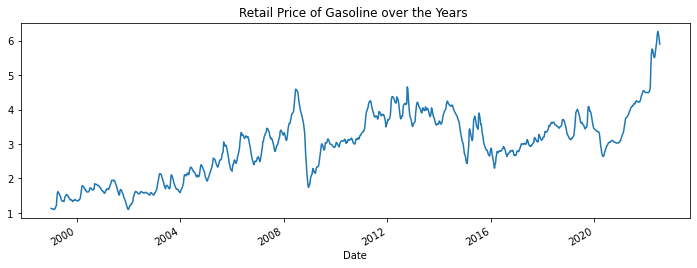

In [42]:
df['Price'].plot(figsize=(12,4))
plt.title("Retail Price of Gasoline over the Years ")

Text(0.5, 1.0, 'Retail Price of Gasoline over the Years ')

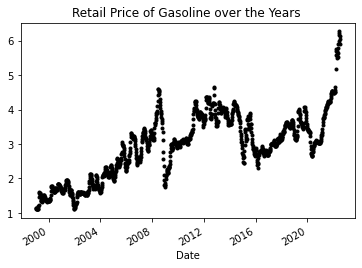

In [43]:
df['Price'].plot(style=['k.'])
plt.title("Retail Price of Gasoline over the Years ")

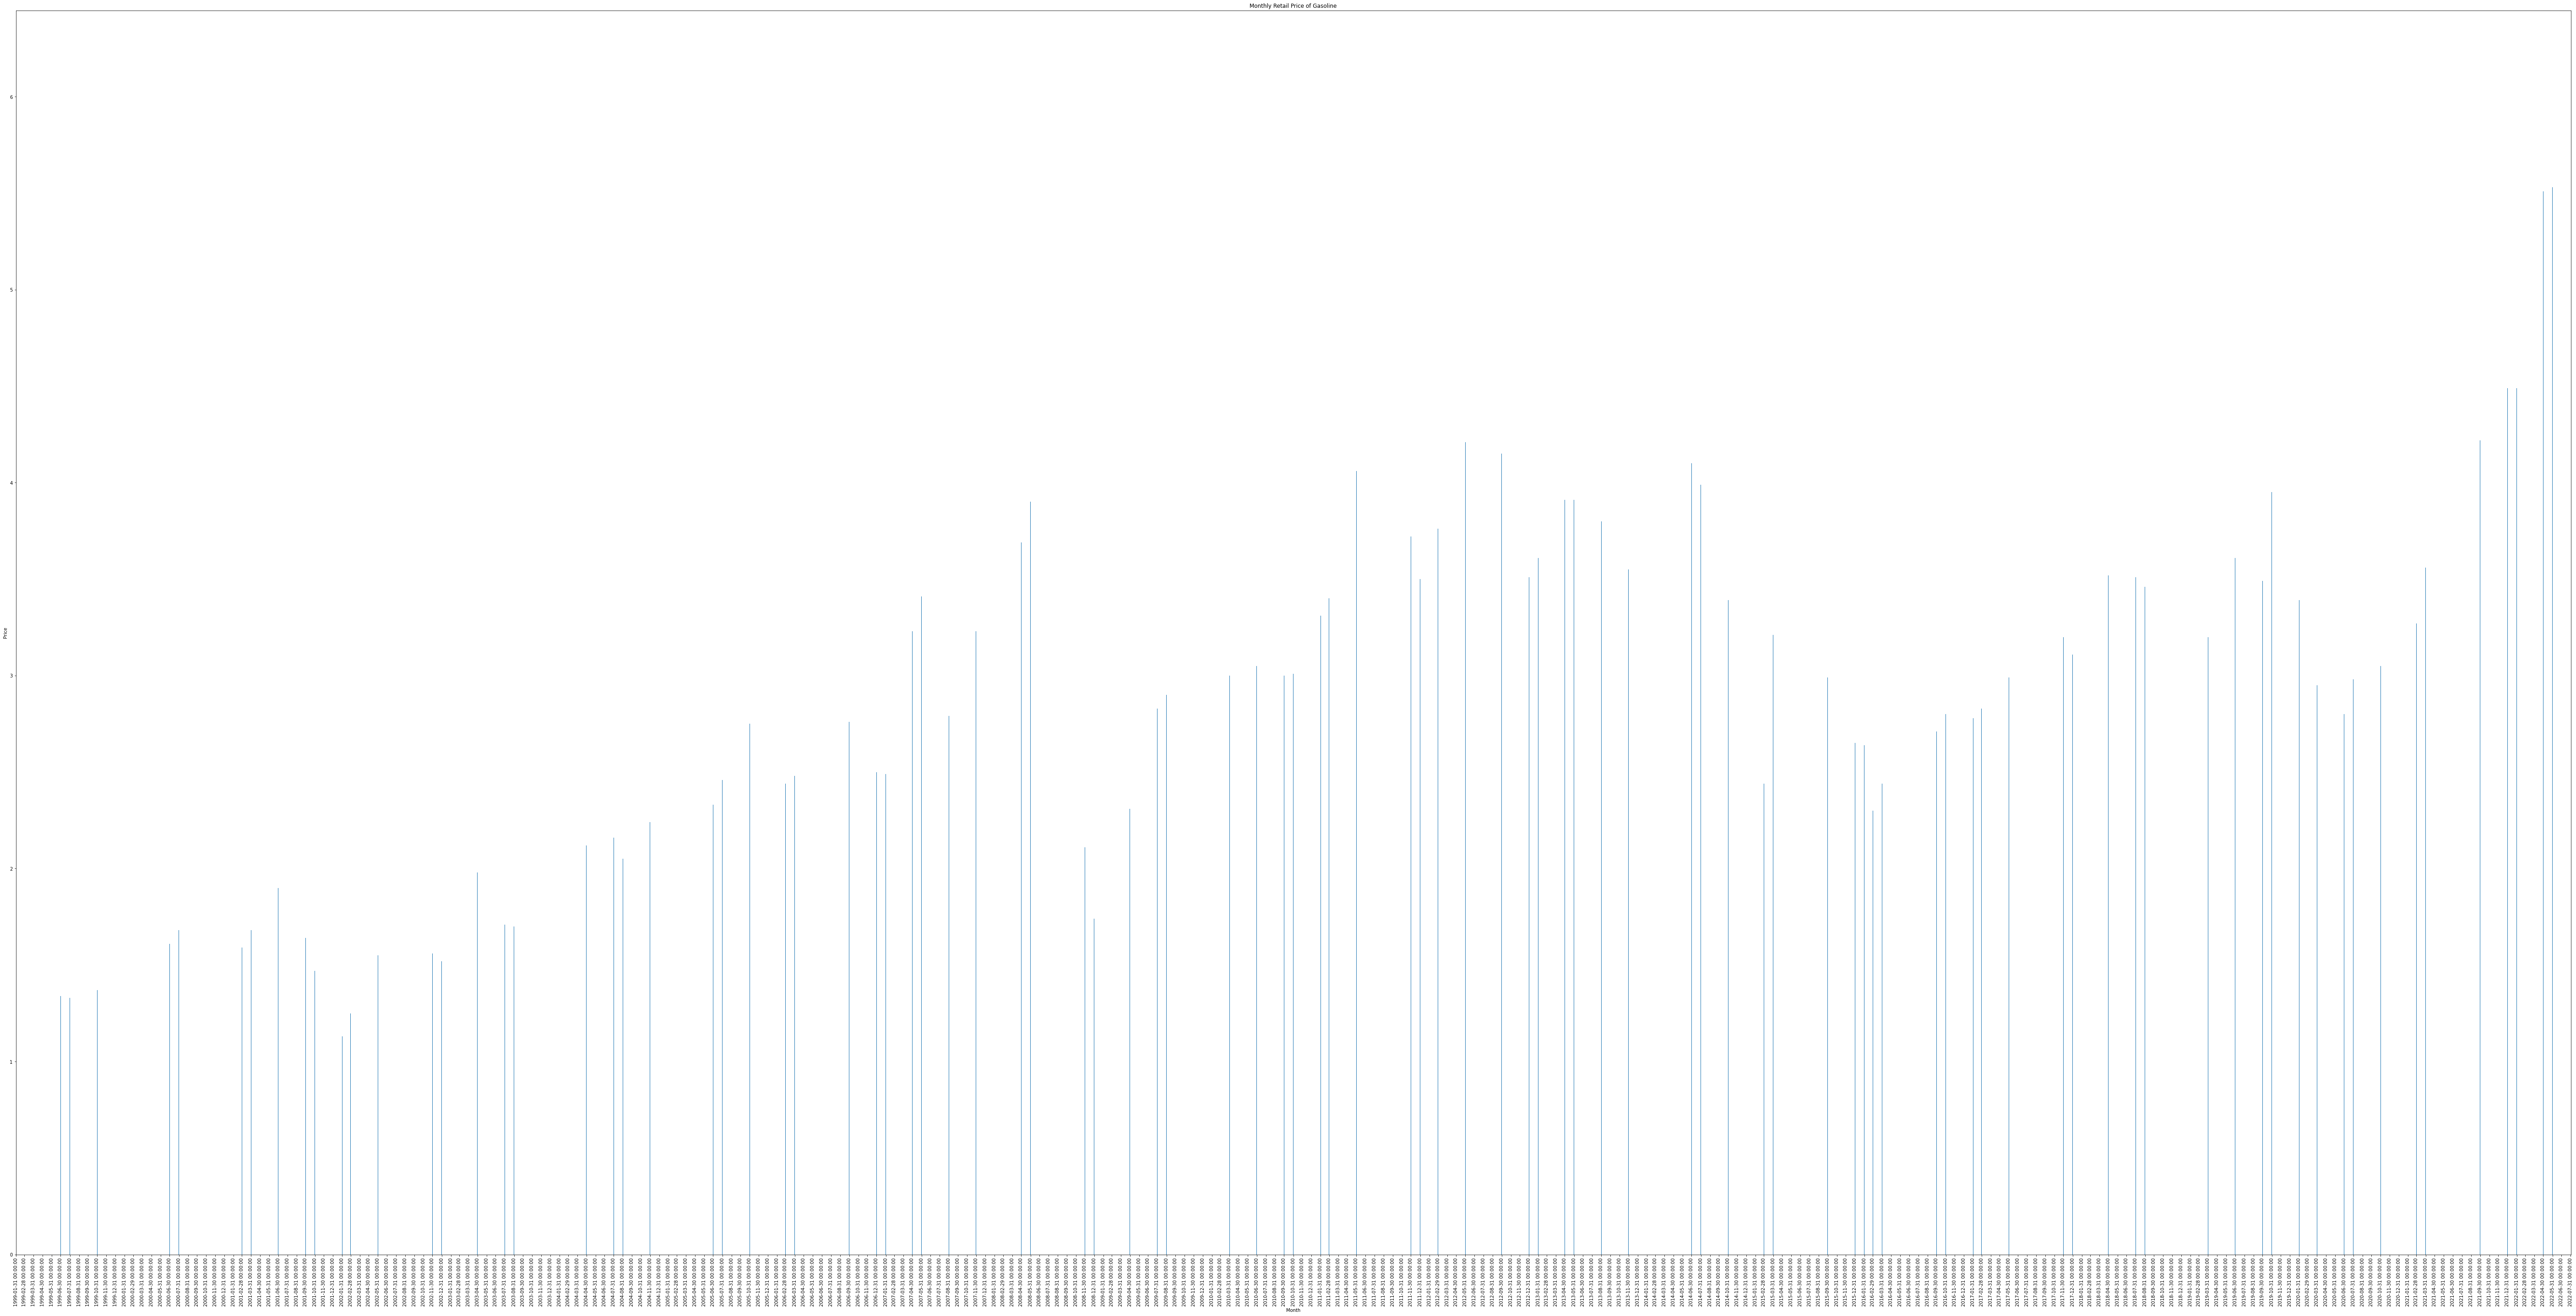

In [44]:
df['Price'].resample(rule='M').min().plot(kind='bar', figsize=(100,50))
plt.title("Monthly Retail Price of Gasoline") 
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [12]:
#selecting data for a sepecific year
df['2021']

,Branded Fuel- Average Retail prices,Unbranded Fuel- Average Retail prices,Price,Year,Month,Week
Date,,,,,,
2021-01-04,3.10,3.10,3.10,2021,1,1
2021-01-11,3.15,3.15,3.15,2021,1,2
2021-01-18,3.21,3.21,3.21,2021,1,3
2021-01-25,3.25,3.25,3.25,2021,1,4
2021-02-01,3.27,3.27,3.27,2021,2,5
2021-02-08,3.32,3.32,3.32,2021,2,6
2021-02-15,3.35,3.35,3.35,2021,2,7
2021-02-22,3.45,3.45,3.45,2021,2,8
2021-03-01,3.56,3.56,3.56,2021,3,9


In [13]:
#Check if there is any missing data
df.isna().sum()

Branded Fuel- Average Retail prices      0
Unbranded Fuel- Average Retail prices    0
Price                                    0
Year                                     0
Month                                    0
Week                                     0
dtype: int64

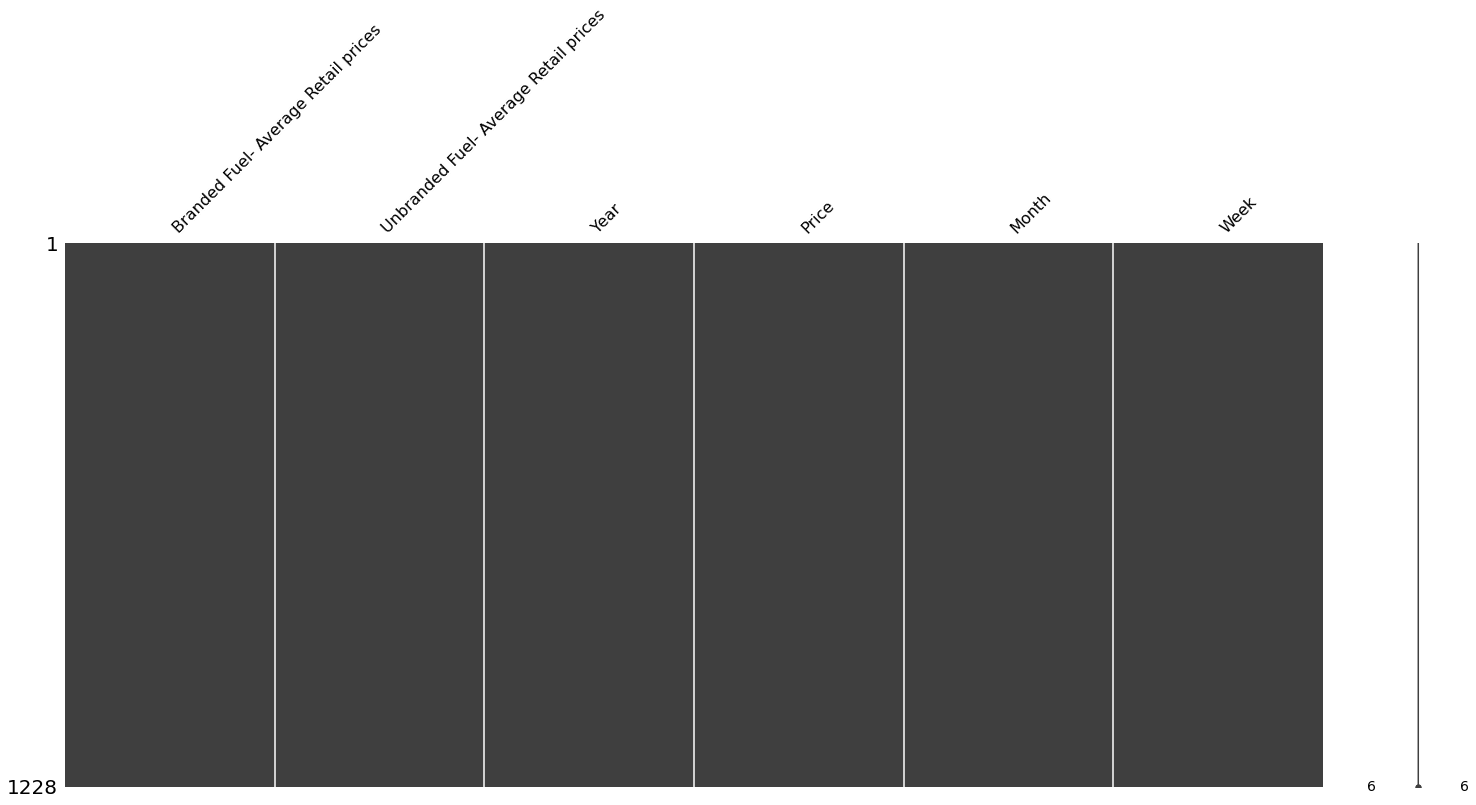

In [47]:
# Visualize missingness matrix
msno.matrix(df)
plt.show()

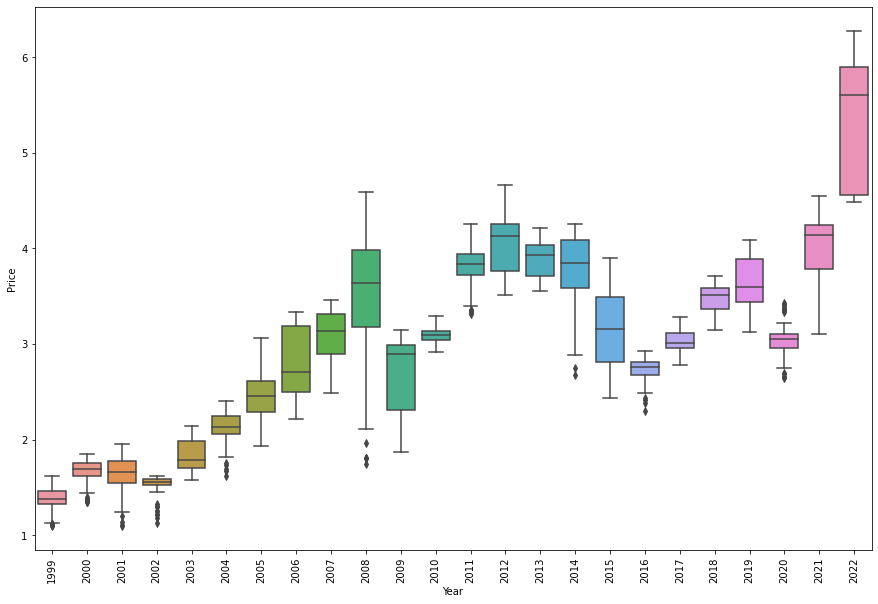

In [26]:
#boxplot for identifying outliers
plt.figure(figsize=(15,10))
_ = sns.boxplot(x='Year', y='Price',
data=df)
_ = plt.xlabel('Year')
_ = plt.ylabel('Price')
_=plt.xticks(rotation = 90)
plt.show()

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,Branded Fuel- Average Retail prices,Unbranded Fuel- Average Retail prices,Price,Year,Month,Week
Date,,,,,,


In [28]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

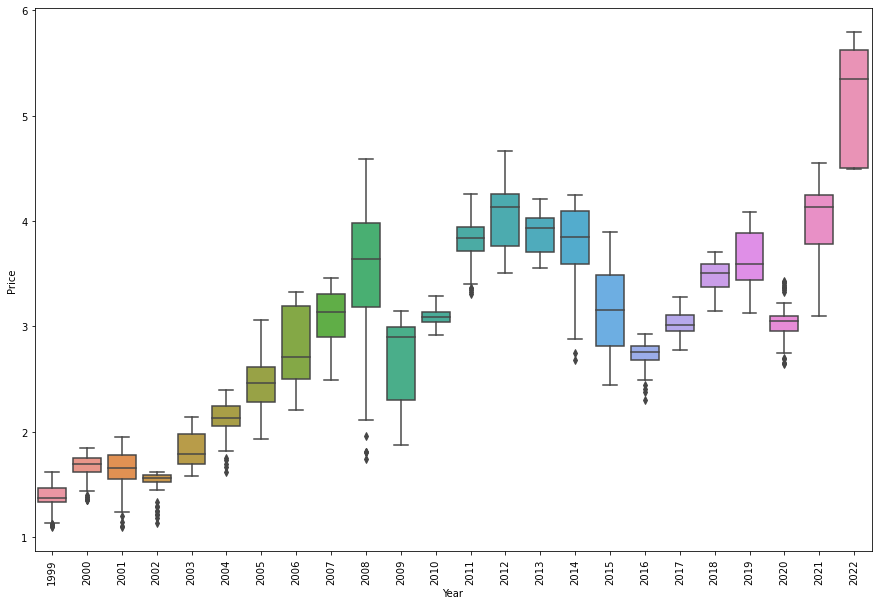

In [34]:
plt.figure(figsize=(15,10))
_ = sns.boxplot(x='Year', y='Price',
data=df)
_ = plt.xlabel('Year')
_ = plt.ylabel('Price')
_=plt.xticks(rotation = 90)
plt.show()

In [35]:
# Calculate the z-scores
z_scores = stats.zscore(df)
z_scores

,Branded Fuel- Average Retail prices,Unbranded Fuel- Average Retail prices,Price,Year,Month,Week
Date,,,,,,
1999-01-04,-1.938307,-1.938176,-1.938242,-1.658093,-1.581043,-1.677672
1999-01-11,-1.938307,-1.938176,-1.938242,-1.658093,-1.581043,-1.611421
1999-01-18,-1.949133,-1.949002,-1.949068,-1.658093,-1.581043,-1.545170
1999-01-25,-1.949133,-1.949002,-1.949068,-1.658093,-1.581043,-1.478919
1999-02-01,-1.959959,-1.959828,-1.959894,-1.658093,-1.291770,-1.412668
...,...,...,...,...,...,...
2022-04-18,2.846961,2.846923,2.846942,1.748416,-0.713224,-0.683906
2022-04-25,2.803655,2.803618,2.803638,1.748416,-0.713224,-0.617655
2022-05-02,2.825308,2.825271,2.825290,1.748416,-0.423951,-0.551404


In [36]:
# Convert to absolute values
abs_z_scores = np.abs(z_scores)

# Select data points with a z-scores above or below 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Filter the dataset
df_wo_outliers = df[filtered_entries]
df_wo_outliers.shape

(1216, 6)